# IMDB Movie Reviews Sentiment Analysis Preprocessing

In this notebook, we will preprocess the IMDB movie reviews dataset to prepare it for sentiment analysis. The steps include data loading, cleaning, tokenization, handling negations, lemmatization, stop word removal, and finally saving the preprocessed data.

Let's get started!



In [ ]:
# Install contractions library
!pip install contractions

## 1. Install and Import Libraries

First, we need to install and import the necessary libraries for data manipulation, visualization, and text processing.


In [ ]:
# Data manipulation and visualization
import pandas as pd  # Data manipulation (DataFrames).
import numpy as np  # Numerical operations.
import matplotlib.pyplot as plt  # Plotting.
import seaborn as sns  # Statistical visualizations.

# Text processing
import re  # Regular expressions for pattern matching.
import nltk  # NLP tasks (tokenization, lemmatization, etc.).
import string  # String constants (e.g., punctuation).
from bs4 import BeautifulSoup  # Parse HTML/XML, clean text.
from nltk.corpus import stopwords, wordnet  # Stopwords and lexical database.
from nltk.tokenize import word_tokenize  # Split text into words.
from nltk.stem import WordNetLemmatizer  # Reduce words to base form.

# For handling contractions
import contractions  # Expand contractions (e.g., "can't" → "cannot").

# Machine learning utilities
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to TF-IDF features.
from sklearn.preprocessing import LabelEncoder  # Encode labels.
from sklearn.model_selection import train_test_split  # Split data.

# Download necessary NLTK data files
nltk.download('punkt')  # Tokenizer models.
nltk.download('stopwords')  # Collection of stopwords for different languages.
nltk.download('wordnet')  # WordNet corpus for lemmatization.
nltk.download('averaged_perceptron_tagger')  # Part-of-speech tagger model.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 2. Load and Explore the Dataset

We will load the IMDB dataset into a pandas DataFrame and perform some basic exploratory data analysis to understand its structure.


In [ ]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Let's check the basic information about the dataset, including the number of entries, data types, and any missing values.
and let's explore the distribution of sentiments in the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
Missing values per column:
review       0
sentiment    0
dtype: int64

Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


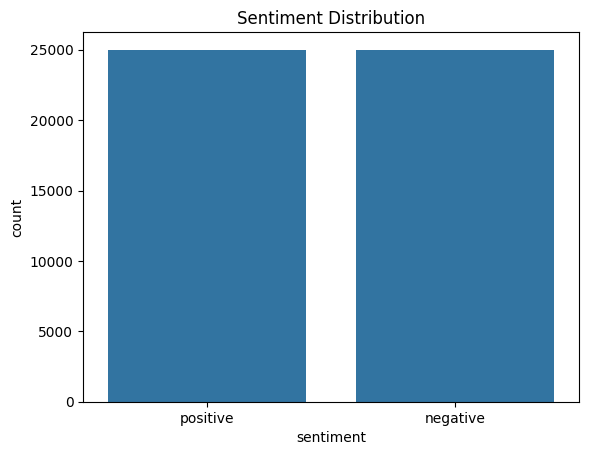

In [ ]:
# Basic information about the dataset
df.info()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Distribution of sentiments
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


## 3. Data Cleaning

The raw text data contains noise such as HTML tags, URLs, punctuation, numbers, and extra whitespace. We will clean the text data by performing the following steps:

1. **Expand Contractions**: Convert contractions (e.g., "don't") to their expanded forms ("do not").
2. **Lowercase Text**: Convert all text to lowercase for uniformity.
3. **Remove HTML Tags**: Strip out HTML content.
4. **Remove URLs**: Eliminate web addresses.
5. **Remove Non-ASCII Characters**: Remove emojis and other non-standard characters.
6. **Remove Punctuation**: Remove punctuation marks.
7. **Remove Numbers**: Remove numerical digits.
8. **Remove Extra Whitespace**: Clean up irregular spacing.


In [ ]:
# Function to expand contractions
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text


In [ ]:
# Function to clean the review text
def clean_text(text):
    # 1. Expand contractions
    text = expand_contractions(text)

    # 2. Lowercase the text
    text = text.lower()

    # 3. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 4. Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # 5. Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # 6. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 7. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 8. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


Apply the `clean_text` function to the 'review' column to clean the text data.


In [ ]:
# Apply the cleaning function to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)

# View the cleaned reviews
df[['review', 'cleaned_review']].head()


<ipython-input-9-899e5c2bdcf2>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...


## 4. Tokenization

Tokenization involves splitting the cleaned text into individual words (tokens) for further analysis.


In [ ]:
# Tokenize the cleaned reviews
df['tokens'] = df['cleaned_review'].apply(word_tokenize)

# View tokens
df[['cleaned_review', 'tokens']].head()


,cleaned_review,tokens
0,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


## 5. Handling Negations

Negation words can significantly alter the meaning of a sentence (e.g., "not good" vs. "good"). We will handle negations by combining negation words with the words that follow them to preserve the negation effect.

We define a function to handle negations by combining negation words with the words that follow them. This helps preserve the sentiment conveyed by phrases like "not good".

We apply the handle_negations function to the tokens and create a new column 'tokens_neg'.


In [ ]:
# Function to handle negations
def handle_negations(tokens):
    negations = {"not", "no", "never", "nothing", "nowhere", "hardly", "scarcely", "barely", "neither", "nor", "cannot", "can't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "mightn't", "mustn't"}
    transformed_tokens = []
    skip_next = False
    for i in range(len(tokens)):
        word = tokens[i]
        if skip_next:
            skip_next = False
            continue
        if word in negations and i+1 < len(tokens):
            combined_word = word + '_' + tokens[i+1]
            transformed_tokens.append(combined_word)
            skip_next = True
        else:
            transformed_tokens.append(word)
    return transformed_tokens

# Apply negation handling
df['tokens_neg'] = df['tokens'].apply(handle_negations)

# View tokens after handling negations
df[['tokens', 'tokens_neg']].head()


,tokens,tokens_neg
0,"[one, of, the, other, reviewers, has, mentione...","[one, of, the, other, reviewers, has, mentione..."
1,"[a, wonderful, little, production, the, filmin...","[a, wonderful, little, production, the, filmin..."
2,"[i, thought, this, was, a, wonderful, way, to,...","[i, thought, this, was, a, wonderful, way, to,..."
3,"[basically, there, is, a, family, where, a, li...","[basically, there, is, a, family, where, a, li..."
4,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, in, the, time, of, mon..."


## 6. Lemmatization

We perform lemmatization to reduce words to their base or dictionary form, which helps in normalizing the text data.

 **Advantages of Lemmatization:**
*   Produces more accurate and meaningful results compared to stemming.
*   Helps in reducing vocabulary size, making text analysis more efficient.
*   Improves the performance of NLP models by ensuring that related words are treated as the same term.

###Function to Get WordNet POS Tag

To lemmatize accurately, it's often necessary to know the part of speech of the word (e.g., noun, verb, adjective).

We define a function to get the appropriate WordNet POS tag for each word.

In [ ]:
# Function to get the WordNet POS tag
def get_wordnet_pos(word):
    # Get the POS tag for the word
    tag = nltk.pos_tag([word])[0][1][0].upper()
    # Map NLTK POS tags to WordNet POS tags
    tag_dict = {
        "J": wordnet.ADJ,  # Adjective
        "N": wordnet.NOUN,  # Noun
        "V": wordnet.VERB,  # Verb
        "R": wordnet.ADV    # Adverb
    }
    # Return the WordNet POS tag; default to Noun if not found
    return tag_dict.get(tag, wordnet.NOUN)

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = []
    for token in tokens:
        pos_tag = get_wordnet_pos(token)  # Get POS tag for the token
        lemmatized_token = lemmatizer.lemmatize(token, pos_tag)  # Lemmatize the token
        lemmatized_tokens.append(lemmatized_token)
    return lemmatized_tokens

# Apply lemmatization to the tokens after handling negations
df['lemmatized_tokens'] = df['tokens_neg'].apply(lemmatize_tokens)

# View tokens before and after lemmatization
df[['tokens_neg', 'lemmatized_tokens']].head()


,tokens_neg,lemmatized_tokens
0,"[one, of, the, other, reviewers, has, mentione...","[one, of, the, other, reviewer, have, mention,..."
1,"[a, wonderful, little, production, the, filmin...","[a, wonderful, little, production, the, film, ..."
2,"[i, thought, this, was, a, wonderful, way, to,...","[i, thought, this, be, a, wonderful, way, to, ..."
3,"[basically, there, is, a, family, where, a, li...","[basically, there, be, a, family, where, a, li..."
4,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, in, the, time, of, mon..."


## 7. Stop Word Removal

Stop words are common words that may not add significant meaning to the text analysis (e.g., "the", "and", "is"). We will remove these words to focus on the more meaningful words. Additionally, we will add custom stop words relevant to movie reviews.

We remove common words (stop words) that may not contribute significantly to the analysis.

We apply the stop word removal function to the lemmatized tokens.



In [ ]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Optionally, add custom stop words
custom_stop_words = ['movie', 'film', 'character', 'characters', 'story', 'plot']
stop_words.update(custom_stop_words)

# Function to remove stop words
def remove_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply stop word removal
df['final_tokens'] = df['lemmatized_tokens'].apply(remove_stopwords)

# View final tokens
df[['lemmatized_tokens', 'final_tokens']].head()


,lemmatized_tokens,final_tokens
0,"[one, of, the, other, reviewer, have, mention,...","[one, reviewer, mention, watch, oz, episode, h..."
1,"[a, wonderful, little, production, the, film, ...","[wonderful, little, production, technique, una..."
2,"[i, thought, this, be, a, wonderful, way, to, ...","[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, there, be, a, family, where, a, li...","[basically, family, little, boy, jake, think, ..."
4,"[petter, matteis, love, in, the, time, of, mon...","[petter, matteis, love, time, money, visually,..."


## 8. Reconstructing the Final Preprocessed Text

After preprocessing, we will join the tokens back into a single string for each review. This is necessary for certain modeling techniques that require text input in string format.


In [ ]:
# Join tokens back into a string
df['final_text'] = df['final_tokens'].apply(lambda tokens: ' '.join(tokens))

# View final preprocessed text
df[['cleaned_review', 'final_text']].head()


,cleaned_review,final_text
0,one of the other reviewers has mentioned that ...,one reviewer mention watch oz episode hooked r...
1,a wonderful little production the filming tech...,wonderful little production technique unassumi...
2,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,basically there is a family where a little boy...,basically family little boy jake think zombie ...
4,petter matteis love in the time of money is a ...,petter matteis love time money visually stun w...


In [ ]:
# Save the preprocessed data to a new CSV file
df.to_csv('IMDB_preprocessed.csv', index=False)

print("Preprocessed data saved to 'IMDB_preprocessed.csv'")


Preprocessed data saved to 'IMDB_preprocessed.csv'


In [ ]:
# Check the final preprocessed text
df['final_tokens'].head()


#9. Encode Sentiment Labels

In [ ]:
# Encode the sentiment labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])  # 'positive' becomes 1, 'negative' becomes 0


#10. Split Data into Features and Target Variables
We need to separate our dataset into features (input variables) and the target variable (output labels) for model training.



In [ ]:
# Split the data into features (X) and target (y)
X = df['final_text']
y = df['label']

#11. Split Data into Training and Testing Sets
To evaluate our model's performance on unseen data, we split the dataset into training and testing sets.



In [ ]:
# Split into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#12. Initialize the TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency)
We need to convert the text data into numerical feature vectors that can be used by machine learning algorithms. We use the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer for this purpose.

![TF-IDF Vectorizer](/content/idf.png)
![TF-IDF Vectorizer](/content/tf.png)

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
)


#13. Fit the Vectorizer on the Training Text
We fit the TF-IDF vectorizer on the training data to learn the vocabulary and compute the IDF values.



In [ ]:
# Fit the vectorizer on the training text
tfidf_vectorizer.fit(X_train_text)

TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

#14. Transform the Training and Testing Text Data
We transform both the training and testing text data into TF-IDF feature matrices.

In [ ]:
# Transform the training and testing text data
X_train = tfidf_vectorizer.transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

#15. Viewing TF-IDF Features for a Small Sample
To inspect the TF-IDF values and understand how the text data has been transformed, we can view a small sample of the TF-IDF feature matrix.

**. TF-IDF Score:**
Definition: Each term in the resulting feature matrix has an associated TF-IDF score. This score indicates the term's importance in the specific document, adjusted for how frequently it appears across all documents in the corpus.

**. Interpretation:**

1.   A higher TF-IDF score means that the term is more significant in the document compared to its occurrence in other documents. This could indicate that the term is a key topic or relevant keyword for that particular document.
2.   A lower TF-IDF score suggests that the term is either common across many documents or not particularly relevant to the specific document being analyzed.






In [ ]:
# If you need to view the TF-IDF features for a small sample
sample_indices = np.random.choice(X_train.shape[0], size=5, replace=False)
sample_tfidf = X_train[sample_indices]

# Convert the small sample to a dense array (manageable size)
sample_tfidf_dense = sample_tfidf.toarray()

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for the sample
sample_df = pd.DataFrame(sample_tfidf_dense, columns=feature_names)

# Display the sample DataFrame
print(sample_df)


   aaron  abandon  abbott  abc  abduct  ability  able  able get  able make  \
0    0.0      0.0     0.0  0.0     0.0      0.0   0.0       0.0        0.0   
1    0.0      0.0     0.0  0.0     0.0      0.0   0.0       0.0        0.0   
2    0.0      0.0     0.0  0.0     0.0      0.0   0.0       0.0        0.0   
3    0.0      0.0     0.0  0.0     0.0      0.0   0.0       0.0        0.0   
4    0.0      0.0     0.0  0.0     0.0      0.0   0.0       0.0        0.0   

   able see  ...   yr  zane  zany  zellweger  zero  zoey  zombi  zombie  zone  \
0       0.0  ...  0.0   0.0   0.0        0.0   0.0   0.0    0.0     0.0   0.0   
1       0.0  ...  0.0   0.0   0.0        0.0   0.0   0.0    0.0     0.0   0.0   
2       0.0  ...  0.0   0.0   0.0        0.0   0.0   0.0    0.0     0.0   0.0   
3       0.0  ...  0.0   0.0   0.0        0.0   0.0   0.0    0.0     0.0   0.0   
4       0.0  ...  0.0   0.0   0.0        0.0   0.0   0.0    0.0     0.0   0.0   

   zoom  
0   0.0  
1   0.0  
2   0.0  
3   